## Sim Demo

### Imports

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from env.imports import *

In [10]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [11]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 61.4%
RAM Usage: 30.5%
Available RAM: 1.0T
Total RAM: 1.5T
52.4G


In [12]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [13]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [14]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: d3w5x619
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/d3w5x619
Initialized sweep with ID: d3w5x619
1
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.45, 'epochs': 70}


  warnings.warn(



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB


  warnings.warn(



Best val loss so far at epoch 1: 0.0329
Best val loss so far at epoch 2: 0.0302
Best val loss so far at epoch 3: 0.0289
Best val loss so far at epoch 4: 0.0276
Best val loss so far at epoch 5: 0.0266
Epoch 5/70, Train Loss: 0.0660, Val Loss: 0.0266, Time: 5.86s
Best val loss so far at epoch 6: 0.0261
Best val loss so far at epoch 7: 0.0255
Best val loss so far at epoch 8: 0.0243
Best val loss so far at epoch 9: 0.0228
Best val loss so far at epoch 10: 0.0216
Epoch 10/70, Train Loss: 0.0440, Val Loss: 0.0216, Time: 5.58s
Best val loss so far at epoch 11: 0.0198
Best val loss so far at epoch 12: 0.0196
Best val loss so far at epoch 14: 0.0172
Epoch 15/70, Train Loss: 0.0366, Val Loss: 0.0183, Time: 5.54s
Best val loss so far at epoch 16: 0.0162
Best val loss so far at epoch 18: 0.0157
Best val loss so far at epoch 19: 0.0157
Best val loss so far at epoch 20: 0.0150
Epoch 20/70, Train Loss: 0.0296, Val Loss: 0.0150, Time: 5.31s
Best val loss so far at epoch 22: 0.0142
Epoch 25/70, Train L

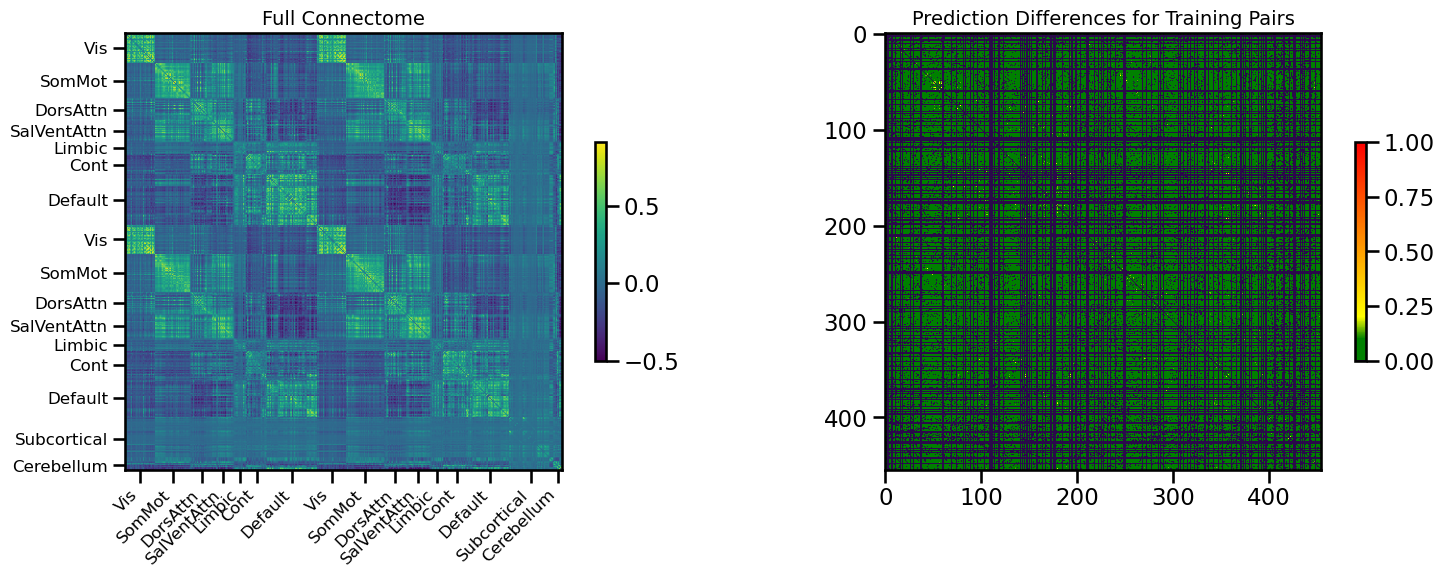

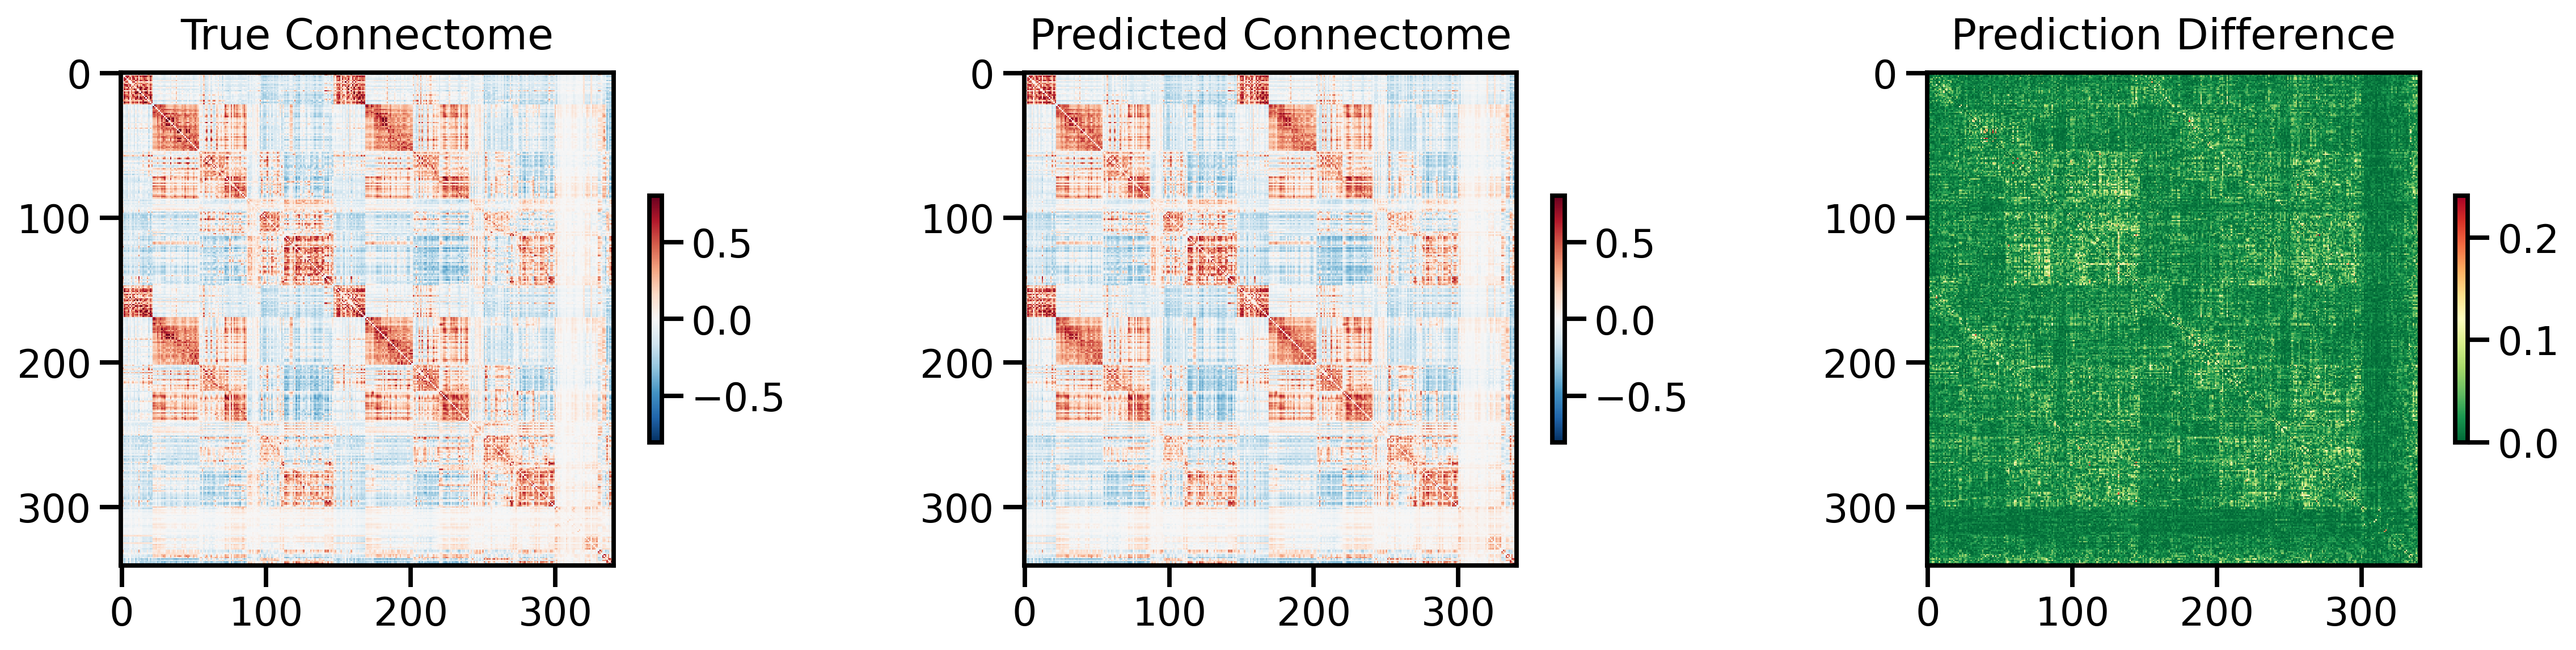

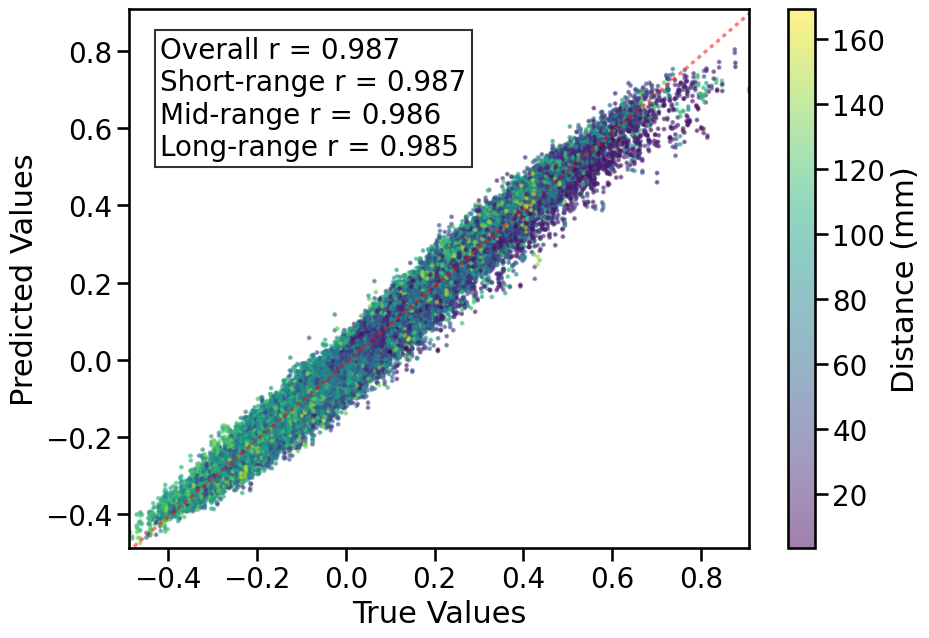

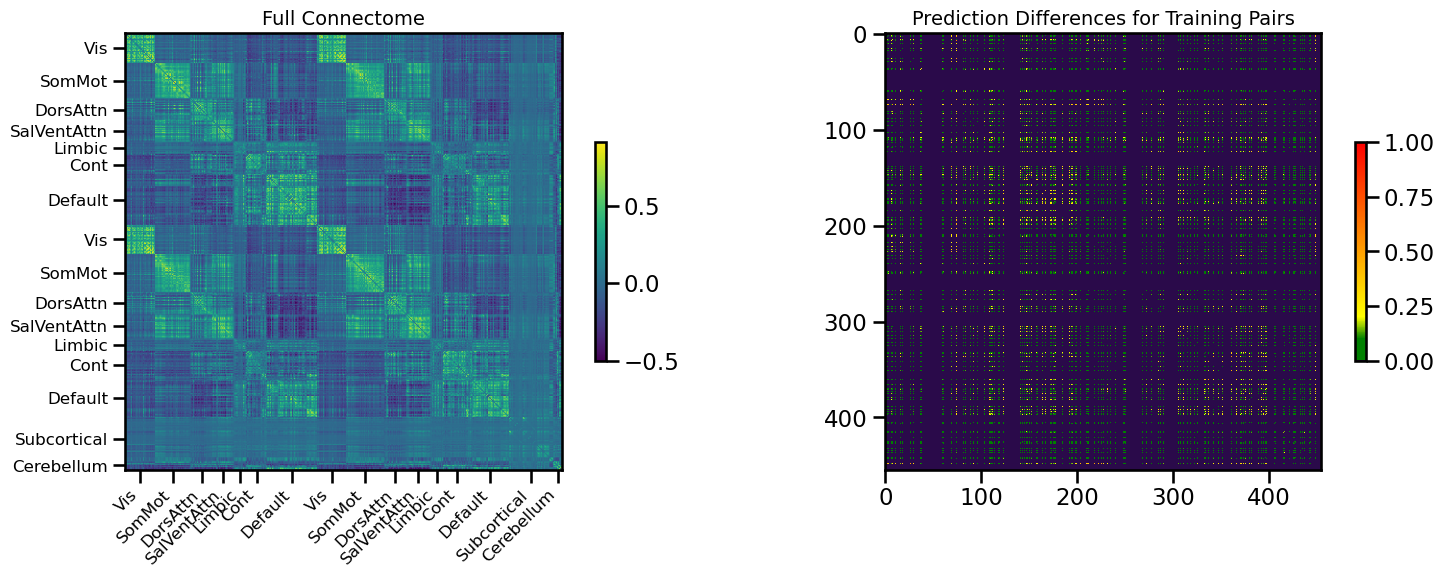

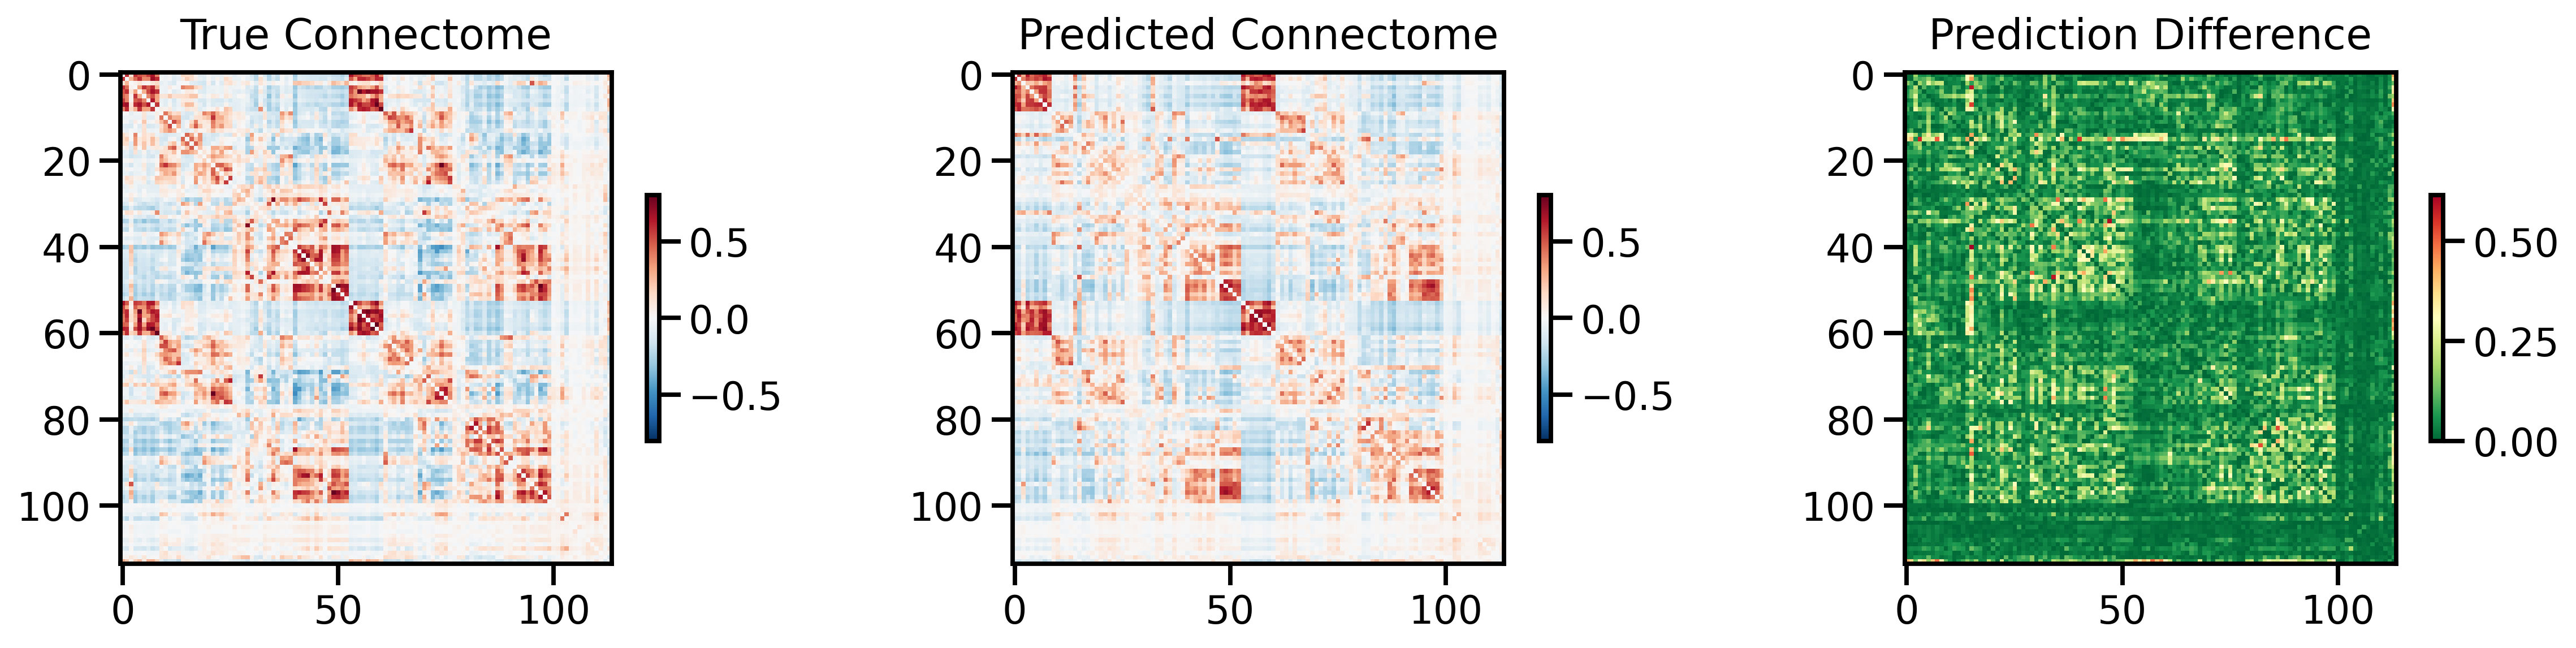

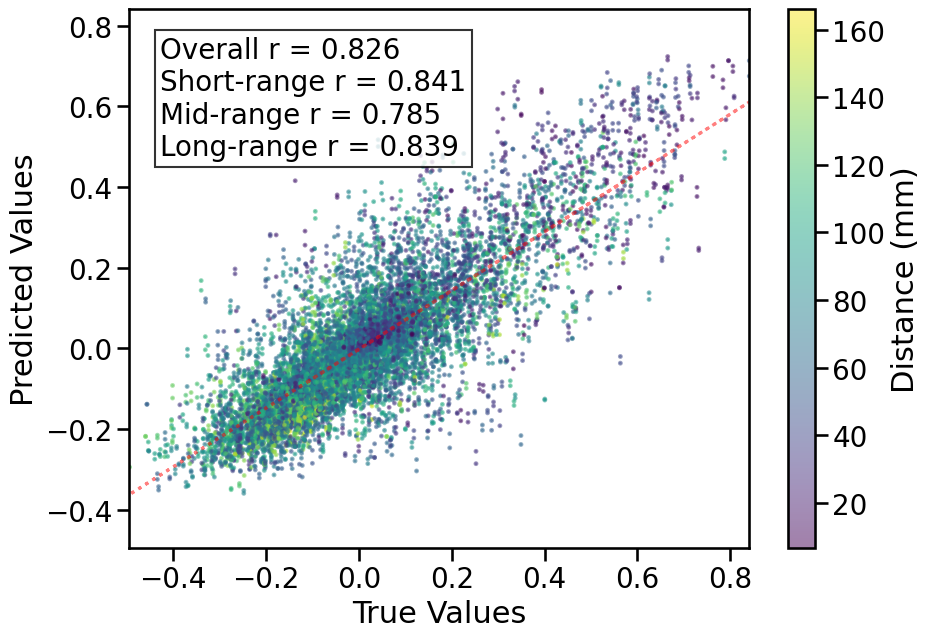


TRAIN METRICS: {'mse': 0.000942984, 'mae': 0.022773806, 'r2': 0.9716680521759795, 'pearson_r': 0.9870113659536538, 'short_r': 0.9872484658370808, 'mid_r': 0.985907218341281, 'long_r': 0.9853891825491408, 'geodesic_distance': 12.901684697597087}
TEST METRICS: {'mse': 0.011283068, 'mae': 0.07334911, 'r2': 0.6780380665205765, 'pearson_r': 0.8259611159254601, 'short_r': 0.840885604046835, 'mid_r': 0.7849684085624178, 'long_r': 0.8393107538987783, 'geodesic_distance': 9.477767065621322}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 7380, 'binarize': False, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128], 'use_positional_encoding': False, 'cls_init': 'spatial_learned', 'use_alibi': True, 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'epochs': 70, 'aug_prob': 0.45}
CPU Usage: 61.0%
RAM Usage: 30.1%
Available RAM: 1.0T
Total RAM: 1.5T
|

49056

In [15]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True, 
              null_model='none', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()